In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error


In [3]:
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

print(ratings.head())
print(movies.head())

   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [4]:
df = pd.merge(ratings, movies, on="movieId")

print(df.head())
print(df.shape)

   userId  movieId  rating   timestamp  \
0       1       16     4.0  1217897793   
1       1       24     1.5  1217895807   
2       1       32     4.0  1217896246   
3       1       47     4.0  1217896556   
4       1       50     4.0  1217896523   

                                       title                   genres  
0                              Casino (1995)              Crime|Drama  
1                              Powder (1995)             Drama|Sci-Fi  
2  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)  Mystery|Sci-Fi|Thriller  
3                Seven (a.k.a. Se7en) (1995)         Mystery|Thriller  
4                 Usual Suspects, The (1995)   Crime|Mystery|Thriller  
(105339, 6)


In [5]:
# check missing values
print(df.isnull().sum())

# drop missing if any
df = df.dropna()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


In [9]:
df['year'] = pd.to_datetime(df['timestamp'], unit='s').dt.year
df['genre_count'] = df['genres'].apply(lambda x: len(x.split('|')))
y = df['rating']

In [10]:
X = df[['userId', 'movieId', 'year', 'genre_count']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [14]:
dt_model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=4,          # small for visualization
    min_samples_split=20,
    random_state=42
)

dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,20
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [30]:
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 1.011720623586688


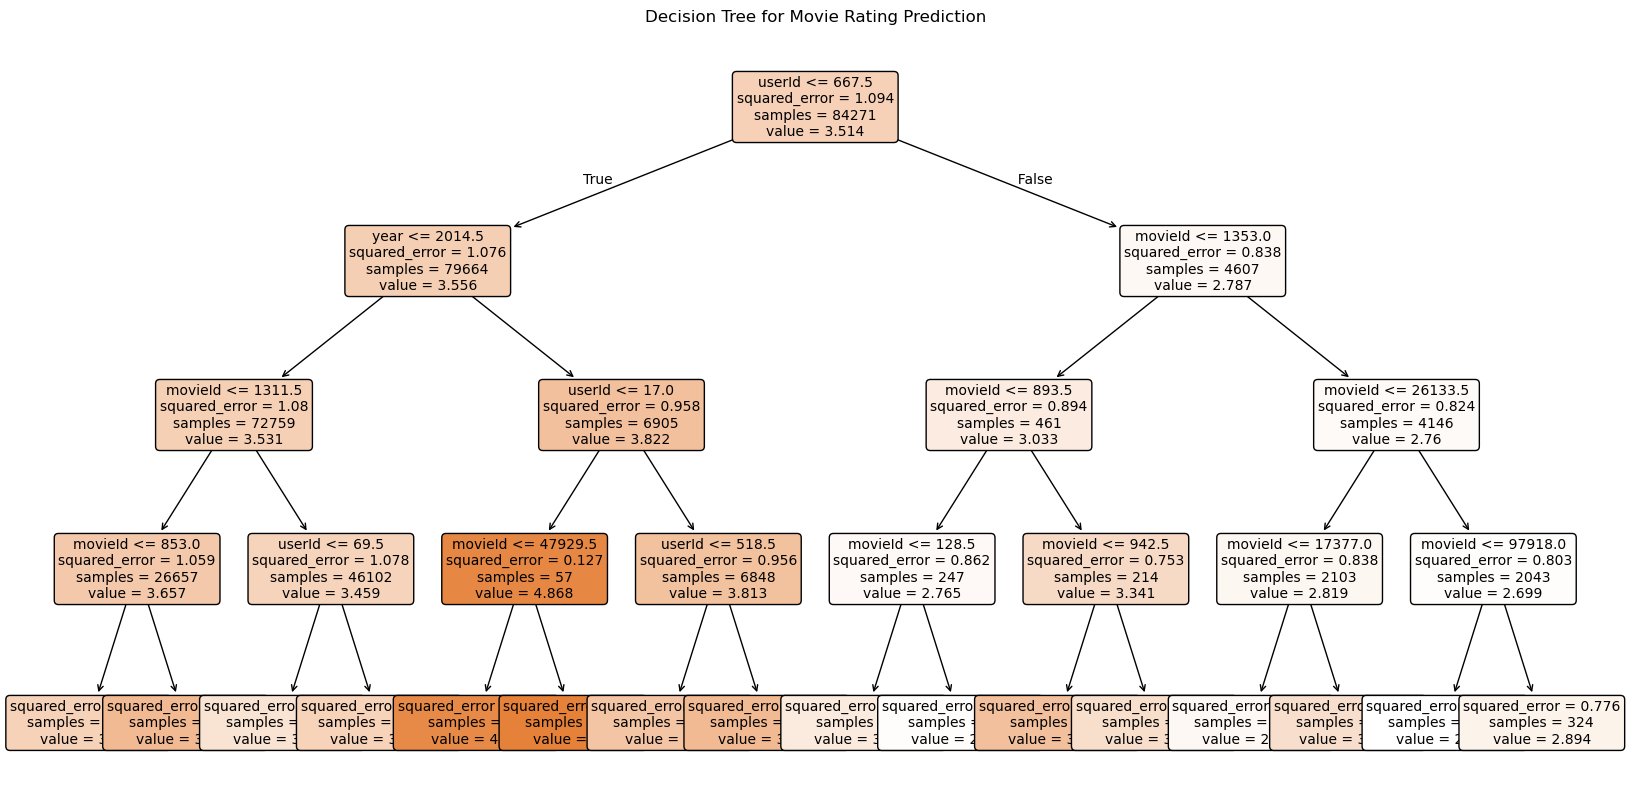

In [32]:
plt.figure(figsize=(20,10))

plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree for Movie Rating Prediction")
plt.show()

In [41]:
# Get feature importance
importances = dt_model.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Sort
feature_importance_df = feature_importance_df.sort_values(
    by='importance',
    ascending=False
).reset_index(drop=True)

print(feature_importance_df)

       feature  importance
0       userId    0.551287
1      movieId    0.352150
2         year    0.096563
3  genre_count    0.000000


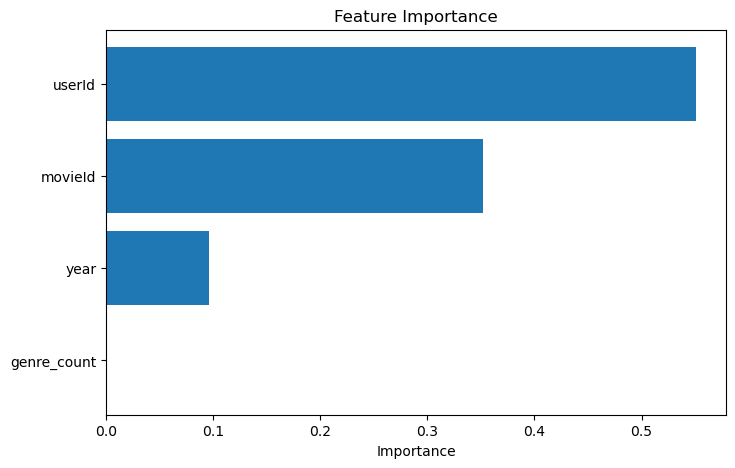

In [44]:


plt.figure(figsize=(8,5))
plt.barh(
    feature_importance_df['feature'],
    feature_importance_df['importance']
)
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

In [56]:
mae = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae:.4f}")

Random Forest MAE: 0.8005
